# CRIME

In [42]:
import pandas as pd
import matplotlib

crime = pd.read_csv('crime.csv', encoding = 'cp1252')

# A. Visualisasi Data

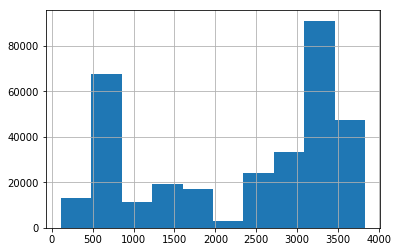

In [6]:
crime.OFFENSE_CODE.hist(log = True) #histogram OFFENSE_CODE

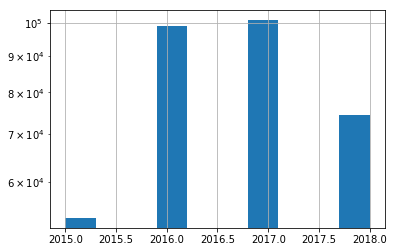

In [7]:
crime.YEAR.hist(log = True) #histogram YEAR

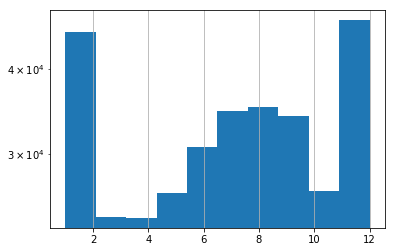

In [8]:
crime.MONTH.hist(log = True) #histogram month

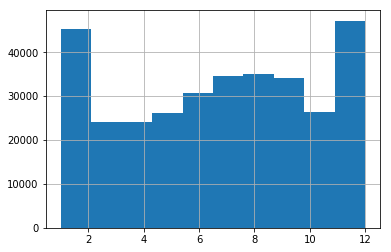

In [10]:
crime.MONTH.hist() #histogram month

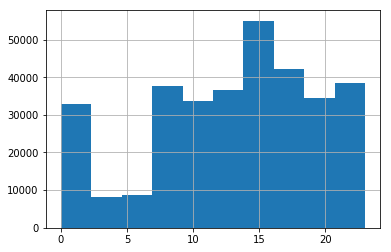

In [11]:
crime.HOUR.hist() #histogram HOUR

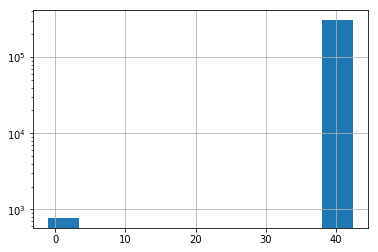

In [14]:
crime.Lat.hist(log = True) #histogram lat

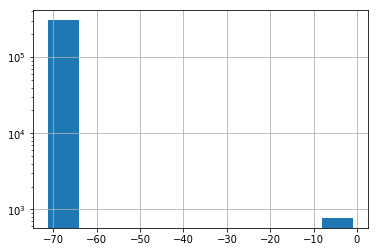

In [15]:
crime.Long.hist(log = True) #histogram long

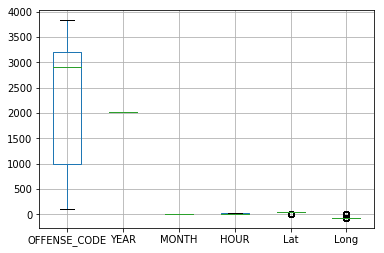

In [18]:
crime.boxplot() #boxplot visualisasi

# B. Atribut Dasar

In [4]:
desc = crime.describe(include = 'all').drop(['count','25%','50%','75%','top','freq','unique']).drop(['INCIDENT_NUMBER','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','DISTRICT','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE','DAY_OF_WEEK','UCR_PART','STREET','Location'],axis=1)
desc.loc['median'] = [crime.median().at['OFFENSE_CODE'] , crime.median().at['YEAR'], crime.median().at['MONTH'], crime.median().at['HOUR'], crime.median().at['Lat'], crime.median().at['Long']]
desc.loc['var'] = [crime.var().at['OFFENSE_CODE'] , crime.var().at['YEAR'], crime.var().at['MONTH'], crime.var().at['HOUR'], crime.var().at['Lat'], crime.var().at['Long']]
desc.loc['kurtosis'] = [crime.kurtosis().at['OFFENSE_CODE'] , crime.kurtosis().at['YEAR'], crime.kurtosis().at['MONTH'], crime.kurtosis().at['HOUR'], crime.kurtosis().at['Lat'], crime.kurtosis().at['Long']]
desc.loc['skew'] = [crime.skew().at['OFFENSE_CODE'] , crime.skew().at['YEAR'], crime.skew().at['MONTH'], crime.skew().at['HOUR'], crime.skew().at['Lat'], crime.skew().at['Long']]

desc

OFFENSE_CODE         YEAR      MONTH       HOUR         Lat  \
mean      2.317961e+03  2016.598676   6.672213  13.114840   42.212995   
std       1.184990e+03     1.009775   3.253984   6.292714    2.173496   
min       1.110000e+02  2015.000000   1.000000   0.000000   -1.000000   
max       3.831000e+03  2018.000000  12.000000  23.000000   42.395042   
median    2.907000e+03  2017.000000   7.000000  14.000000   42.325552   
var       1.404201e+06     1.019645  10.588412  39.598253    4.724085   
kurtosis -1.415226e+00    -1.090411  -1.035742  -0.600736  391.211516   
skew     -4.106447e-01    -0.083805  -0.119591  -0.482938  -19.827352   

                Long  
mean      -70.906030  
std         3.515832  
min       -71.178674  
max        -1.000000  
median    -71.077493  
var        12.361074  
kurtosis  391.324226  
skew       19.831624

# C. Distribusi Peluang

Karena data yang digunakan adalah diskrit maka bisa dapat kita simpulkan bahwa perhitungan nilai ekspektasi dapat dicari dengan menggunakan rumus:
\begin{equation*}
E(X) = \sum_{x} XP(X)
\end{equation*}

sementara itu P(X=K) adalah nilai fungsi probabilitas saat X untk nilai K yang bisa dicari melalui
\begin{equation*}
P(X=K) = \frac {n_{X=K}} {n_{tot}}
\end{equation*}


# D. Jawaban Soal Terkait
- Soal1 : Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang
    * Homicide
    * Homicide Tanpa Shooting
    * Terjadi jam 20.00 dan Hari sabtu


In [35]:
count = 0
for i in range(0, crime.OFFENSE_CODE_GROUP.count()):
    if (crime.at[i,'OFFENSE_CODE_GROUP'] == 'Homicide'):
        count+=1
probability = count/crime.OFFENSE_CODE_GROUP.count()
expected_value = probability * 1000
expected_value

0.5033249954243183

Ekspektasi kejahatan yang Homicide adalah 0.5033249954243183

In [39]:
def isNaN(num):
    return num != num

count = 0
for i in range(0, crime.OFFENSE_CODE_GROUP.count()):
    if (crime.at[i,'OFFENSE_CODE_GROUP'] == 'Homicide' and isNaN(crime.at[i,'SHOOTING']) ):
        count+=1
probability = count/crime.OFFENSE_CODE_GROUP.count()
expected_value = probability * 1000
expected_value

0.1281190897443719

Ekspektasi kejahatan yang Homicide dan tanpa shooting adalah 0.1281190897443719

In [40]:
count = 0
for i in range(0, crime.DAY_OF_WEEK.count()):
    if (crime.at[i,'DAY_OF_WEEK'] == 'Saturday' and crime.at[i, 'HOUR'] == 20):
        count+=1
probability = count/crime.OFFENSE_CODE_GROUP.count()
expected_value = probability * 1000
expected_value

6.683545848331401

Ekspektasi kejahatan yang terjadi jam 20:00 dan hari sabtu adalah 6.683545848331401

- Soal2 : Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang
    * Terletak di Geneva Ave atau Prescott Street
    * Dilaporkan di Kantor Polisi Nomor 495 dan District E18
    * Tidak terjadi pada saat hari libur

In [27]:
count = 0 

for i in range(0,crime.INCIDENT_NUMBER.count()): 
    if crime.at[i,'STREET'] == 'GENEVA AVE' or crime.at[i,'STREET'] == 'PRESCOTT STREET': 
        count += 1 
probability = count/crime.STREET.count() 
expected_value = probability * 2000
expected_value

10.610933490719377

Ekspektasi kejahatan yang terletak di Geneva Ave atau Prescott Street adalah 10.610933490719377

In [23]:
count = 0 

for i in range(0,crime.INCIDENT_NUMBER.count()): 
    if crime.at[i,'DISTRICT'] == 'E18' and crime.at[i,'REPORTING_AREA'] == '495': 
        count += 1 

probability = count/crime.INCIDENT_NUMBER.count()
expected_value = probability * 2000
expected_value

3.019949972545909

Ekspektasi kejahatan yang dilaporkan di Polisi Nomor 495 dan District E18 adalah 3.019949972545909

In [28]:
count = 0 

for i in range(0,crime.INCIDENT_NUMBER.count()): 
    if crime.at[i,'DAY_OF_WEEK'] != 'Saturday' and crime.at[i,'DAY_OF_WEEK'] != 'Sunday': 
        count += 1 

probability = count/crime.INCIDENT_NUMBER.count() 
probability 
expected_value = probability * 2000
expected_value

1467.1283021170154

Ekspektasi kejahatan yang tidak terjadi saat hari libur adalah 1467.1283021170154